In [6]:
import pandas as pd
import os.path as op
import numpy as np
from os import listdir
import pingouin
import matplotlib.pyplot as plt
import seaborn as sns

bids_folder = '/Volumes/mrenkeED/data/ds-dnumrisk'
subs= [int(f[4:]) for f in listdir(bids_folder) if f[0:3] == 'sub']


In [7]:
from numrisk.utils.data import Subject
runs = range(1, 7)

subjects = [Subject(sub, bids_folder) for sub in subs]
behavior = [s.get_behavior_magjudge(runs = runs) for s in subjects]
behavior = pd.concat(behavior).sort_index(0)


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_72025/4025717983.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  behavior = pd.concat(behavior).sort_index(0)


In [ ]:
from utils import get_decoding_info

split_data = 'run_123' # 'full'
pred = [get_decoding_info(sub,bids_folder=bids_folder,split_data=split_data) for sub in subs]
pred = pd.concat(pred)

In [4]:
from tqdm.contrib.itertools import product
from utils import get_decoding_info

data_variants = ['full', 'run_123', 'run_456']

pred = []
for (sub, split_data) in product(subs, data_variants):
    pred.append(get_decoding_info(sub, bids_folder=bids_folder, split_data=split_data))
                
pred = pd.concat(pred)

  6%|▌         | 7/126 [00:00<00:02, 58.11it/s]

/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-10/func/sub-10_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_123.denoise/sub-10/func/sub-10_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_456.denoise/sub-10/func/sub-10_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-01/func/sub-01_ses-1_mask-NPC_R_space-T1w_pars.tsv


 27%|██▋       | 34/126 [00:00<00:01, 59.29it/s]

/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_123.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_456.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-04/func/sub-04_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_123.denoise/sub-04/func/sub-04_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_456.denoise/sub-04/func/sub-04_ses-1_mask-NPC_R_space-T1w_pars.tsv


 94%|█████████▎| 118/126 [00:02<00:00, 46.37it/s]

/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-38/func/sub-38_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_123.denoise/sub-38/func/sub-38_ses-1_mask-NPC_R_space-T1w_pars.tsv
/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect_run_456.denoise/sub-38/func/sub-38_ses-1_mask-NPC_R_space-T1w_pars.tsv


100%|██████████| 126/126 [00:02<00:00, 42.79it/s]


In [8]:
pred

E        sd
subject data    trial_nr                    
23      full    1         1.813796  0.259045
                2         4.183693  0.330421
                3         2.035080  0.186209
                4         2.569386  0.116908
                5         2.442365  0.116785
...                            ...       ...
42      run_456 176       3.617928  0.124263
                177       2.239169  0.221851
                178       2.753460  0.201419
                179       2.607445  0.158162
                180       2.163166  0.191711

[13500 rows x 2 columns]

In [9]:
df = pred.join(behavior['log(n1)'], how='inner')


In [10]:
df.head()

E        sd   log(n1)
subject trial_nr data    run                              
1       1        run_123 1    1.995321  0.336058  1.945910
        2        run_123 1    2.217738  0.293640  2.302585
        3        run_123 1    2.447210  0.304341  2.639057
        4        run_123 1    2.602902  0.125741  2.302585
        5        run_123 1    2.269390  0.329136  1.609438

In [15]:
import pingouin

r = df.groupby(['subject','data']).apply(lambda d: pingouin.corr(d['E'], d['log(n1)']))
r = r.reset_index(2,drop=True) # get rid of None-index with pearson entry


In [16]:
r

n         r          CI95%     p-val   BF10     power
subject data                                                            
1       run_123   90 -0.098708   [-0.3, 0.11]  0.354654  0.201  0.152817
        run_456   90 -0.173934  [-0.37, 0.03]  0.101100  0.494  0.377162
2       full     180  0.207033   [0.06, 0.34]  0.005294  4.411  0.800041
        run_123   90  0.096463   [-0.11, 0.3]  0.365759  0.197  0.148029
        run_456   90  0.111854   [-0.1, 0.31]  0.293898  0.227  0.183244
...              ...       ...            ...       ...    ...       ...
41      run_123   90 -0.016253  [-0.22, 0.19]  0.879154  0.133  0.052485
        run_456   90  0.022403  [-0.19, 0.23]  0.833987  0.135  0.054888
42      full     180  0.102523  [-0.04, 0.25]  0.170835  0.236  0.278655
        run_123   90  0.228757   [0.02, 0.42]  0.030106  1.332  0.588111
        run_456   90 -0.090796  [-0.29, 0.12]  0.394723  0.188  0.136475

[113 rows x 6 columns]

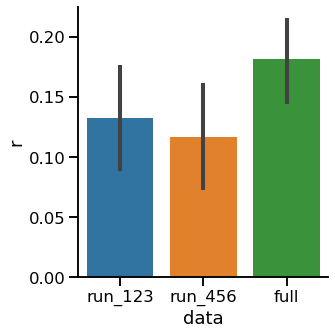

In [18]:
import seaborn as sns
sns.set_context('talk')
sns.catplot(data=r.reset_index(), y='r',x='data',kind='bar')#,errorbar = 'se'